<a href="https://colab.research.google.com/github/Junaid-Akbar35/JUNAID_PROJECTS/blob/main/House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction Project

## Ames Housing Dataset Overview
The Ames Housing Dataset is a popular dataset in machine learning and statistics for regression problems. It was created by Dean De Cock and provides a rich set of features describing residential homes in Ames, Iowa. It serves as an alternative to the Boston Housing Dataset.

**Dataset Details:**
1. **Size**: The dataset contains 2930 observations and 82 features (including the target variable).
2. **Target Variable**: SalePrice (the price of the house in dollars).

3. **Feature Types:**
 - **Numerical Features**: Lot Area, Total Basement Square Footage, etc.
 - **Categorical Features**: Neighborhood, House Style, Roof Material, etc.
 - **Ordinal Features**: Overall Quality, Kitchen Quality, etc.

**Potential Use Cases**:
- Predict house prices based on property characteristics.
- Explore feature engineering and its impact on model performance.
- Test regression algorithms like Linear Regression, Random Forest, and XGBoost.

**Challenges:**
- Handling missing data (several features have NaN values).
- Feature selection and engineering, as there are many features.
- Ensuring models generalize well with non-linear relationships.

## Introduction
This project predicts house prices using a dataset with features like area, location, and amenities. We'll explore the data, preprocess it, build a predictive model, and evaluate its performance.

## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR

**Milestone**: Loaded essential libraries for data manipulation, visualization, and modeling.

## 2. Load the Dataset

In [2]:
# Load the dataset
file_path = "/content/drive/MyDrive/AmesHousing.csv"  # Update this with your file path
data = pd.read_csv(file_path)

#show all colums and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the first few rows
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Observation**: Verify that the dataset has loaded correctly and check the structure of the data.

## 3. Data Overview

In [3]:
# Check for missing values and data types
print("Dataset Info:")
data.info()

# Statistical summary of the dataset
print("Statistical Summary:")
data.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


**Findings**:

The dataset has numerical and categorical features.
Missing values might require handling.


## 4. Data preprocessing

### Missing value count

In [4]:
# Missing value count
data.isnull().sum()



,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
Lot Area,0
Street,0
Alley,2732
Lot Shape,0
Land Contour,0


In [5]:
# Calculate the percentage of missing values for each column
(data.isnull().sum() / len(data)) * 100


,0
Order,0.000000
PID,0.000000
MS SubClass,0.000000
MS Zoning,0.000000
Lot Frontage,16.723549
Lot Area,0.000000
Street,0.000000
Alley,93.242321
Lot Shape,0.000000
Land Contour,0.000000


In [6]:
# Assuming 'data' is your DataFrame as shown in the previous code.
threshold = 0.65
missing_percentages = data.isnull().sum() / len(data)
columns_to_drop = missing_percentages[missing_percentages > threshold].index
data = data.drop(columns=columns_to_drop)
print(f"Columns dropped due to more than {threshold*100}% missing values:\n{columns_to_drop}")
# Now 'data' contains only the columns where missing values percentage is less than or equal to 65%.

Columns dropped due to more than 65.0% missing values:
Index(['Alley', 'Pool QC', 'Fence', 'Misc Feature'], dtype='object')


This code block aims to improve data quality by removing columns with a significant amount of missing data (more than 65% in this case), which could negatively impact the performance of machine learning models.

### Percentage of missing values

In [7]:
# Calculate the percentage of missing values for each column
(data.isnull().sum() / len(data)) * 100


,0
Order,0.000000
PID,0.000000
MS SubClass,0.000000
MS Zoning,0.000000
Lot Frontage,16.723549
Lot Area,0.000000
Street,0.000000
Lot Shape,0.000000
Land Contour,0.000000
Utilities,0.000000


### Handling Missing Values :
this code cleans and prepares the data to ensure the machine learning models can be trained effectively and make reliable predictions.

In [8]:
# Separate numerical and categorical features
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

# Impute numerical missing values using RandomForestRegressor
for col in numerical_cols:
    if data[col].isnull().any():
        # Create a copy to avoid SettingWithCopyWarning
        temp_data = data.copy()

        # Separate data with and without missing values
        data_with_missing = temp_data[temp_data[col].isnull()]
        data_without_missing = temp_data[temp_data[col].notnull()]

        # Define features (X) and target (y)
        X = data_without_missing.drop(col, axis=1)
        X = pd.get_dummies(X, columns=categorical_cols, dummy_na=True)  #One-hot encode categoricals
        y = data_without_missing[col]

        # Split data
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

        # Handle potential missing values in training data
        X_train = X_train.fillna(X_train.mean())

        # Scale numerical features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Train the model
        rf_imputer = RandomForestRegressor(random_state=42)
        rf_imputer.fit(X_train, y_train)

        # Prepare data for imputation
        X_missing = data_with_missing.drop(col, axis=1)
        X_missing = pd.get_dummies(X_missing, columns=categorical_cols, dummy_na=True)
        X_missing = X_missing.reindex(columns=X.columns, fill_value=0)  # Align columns with training data
        X_missing = scaler.transform(X_missing.fillna(X_missing.mean())) # fill NaNs and then scale

        # Predict missing values
        predicted_values = rf_imputer.predict(X_missing)

        # Fill missing values in the original DataFrame
        data.loc[data[col].isnull(), col] = predicted_values

# Impute categorical missing values with the mode
for col in categorical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)


# ... (Rest of your code)

<ipython-input-8-10bbe7adede1>:37: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  X_missing = pd.get_dummies(X_missing, columns=categorical_cols, dummy_na=True)
<ipython-input-8-10bbe7adede1>:37: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`
  X_missing = pd.get_dummies(X_missing, columns=categorical_cols, dummy_na=True)
<ipython-input-8-10bbe7adede1>:37: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.inse

In [9]:
# Calculate the percentage of missing values for each column
(data.isnull().sum() / len(data)) * 100


,0
Order,0.0
PID,0.0
MS SubClass,0.0
MS Zoning,0.0
Lot Frontage,0.0
Lot Area,0.0
Street,0.0
Lot Shape,0.0
Land Contour,0.0
Utilities,0.0


### Correlation matrix

this code generates a visual representation of the relationships between numerical features, allowing you to quickly identify strong positive or negative correlations.

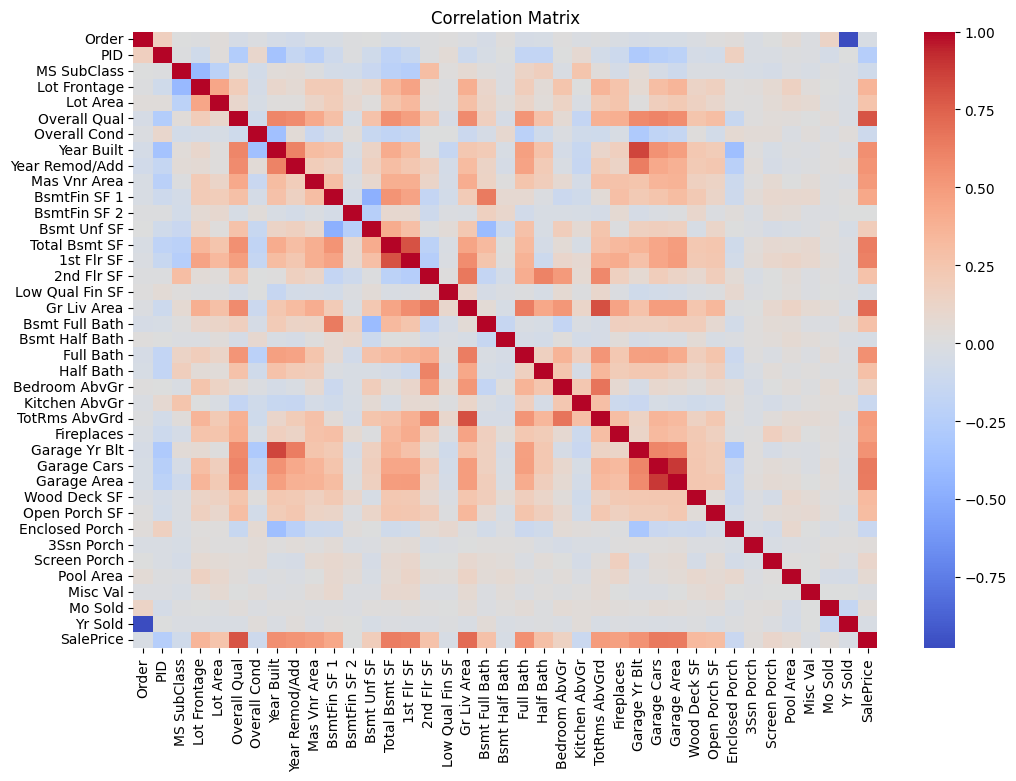

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

### Price distribution
this code generates a histogram showing the frequency of different house prices in the dataset along with a smooth curve (KDE) that represents the overall distribution of prices. This visualization helps to understand the typical price range, the skewness of the distribution, and potential outliers.

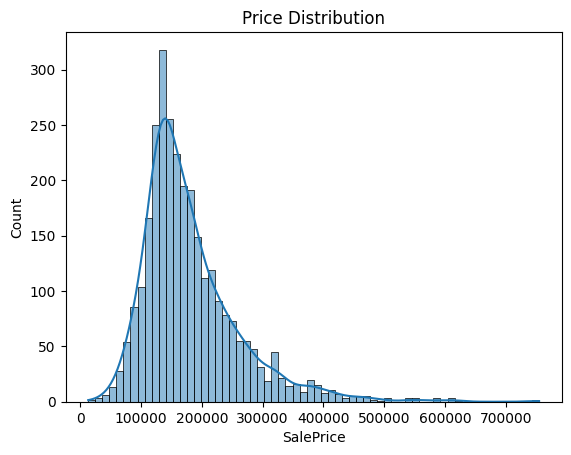

In [11]:
# Price distribution
sns.histplot(data['SalePrice'], kde=True)
plt.title("Price Distribution")
plt.show()


In [12]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,BrkFace,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


### Improved Handling

this code cleans and prepares the data to ensure the machine learning models can be trained effectively and make reliable predictions.

In [13]:

# 5. Data Preprocessing (Continued) - Improved Handling

# Separate numerical and categorical features
numerical_cols = data.select_dtypes(include=np.number).columns
categorical_cols = data.select_dtypes(exclude=np.number).columns

# Identify and handle skewed numerical features
for col in numerical_cols:
    if data[col].skew() > 0.5:  # Adjust the skew threshold as needed
        data[col] = np.log1p(data[col]) # Log transformation

# Impute numerical missing values using median (more robust to outliers)
for col in numerical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].median(), inplace=True)


# Impute categorical missing values with a new category
for col in categorical_cols:
    if data[col].isnull().any():
        data[col] = data[col].fillna('Missing')  # Create a new category


# One-hot encode categorical features (after imputation)
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True) #drop_first to avoid multicollinearity

# Feature scaling (after handling missing values)
scaler = StandardScaler()
numerical_data = data[numerical_cols]
scaled_numerical_data = scaler.fit_transform(numerical_data)
data[numerical_cols] = scaled_numerical_data

# ... (Rest of your code)

### 6. Model Building and Evaluation
This part of the code focuses on training and evaluating different machine learning models to predict house prices.

Linear Regression RMSE: 134518816555.85059
Ridge Regression RMSE: 0.2667229978390392
Random Forest RMSE: 0.3008417130570954
Gradient Boosting RMSE: 0.28410378164315153
Support Vector Regression RMSE: 0.2702399151200249


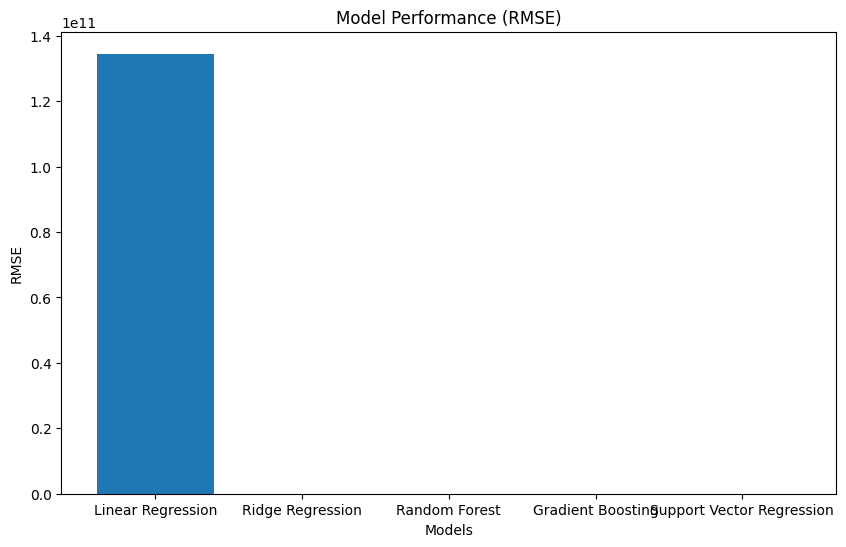


Best Model: Ridge Regression with RMSE: 0.2667229978390392


In [14]:
# Define features (X) and target (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse
    print(f"{name} RMSE: {rmse}")

# Plotting Results (optional)
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title("Model Performance (RMSE)")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.show()

# Choosing the best model based on RMSE
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with RMSE: {results[best_model_name]}")

In [15]:
# Assuming 'y_test' and 'y_pred' are available for each model
# Replace with your actual predictions for each model

# Sample predictions (replace with your actual model predictions)
y_test_sample = y_test[:10] # Assuming y_test is your test target variable

results_df = pd.DataFrame({'Actual': y_test_sample})

for name, model in models.items():
    y_pred = model.predict(X_test[:10])  # Predict on first 10 samples of the test set
    results_df[name] = y_pred

results_df

,Actual,Linear Regression,Ridge Regression,Random Forest,Gradient Boosting,Support Vector Regression
1357,-0.078057,-0.267985,-0.317269,0.068361,0.200914,-0.205578
2367,-0.882475,-0.970001,-0.971252,-1.261144,-1.123123,-1.057416
2822,0.410900,0.339764,0.269927,0.296795,0.380972,0.414012
2126,-0.726750,-0.588625,-0.599887,-0.873264,-0.677511,-0.724033
1544,-0.679559,-0.791451,-0.746735,-1.093838,-0.894762,-0.931945
2415,0.115168,0.254453,0.253388,0.113573,0.134853,0.136701
2227,0.454223,-0.152040,-0.198298,-0.195381,0.094834,-0.182219
410,-0.276379,-0.306367,-0.327780,-0.259282,-0.311965,-0.322470
761,-1.539541,-1.452994,-1.423092,-1.720262,-1.526343,-1.171460
436,2.215125,2.104240,1.889053,1.856626,1.661353,1.908960


**Select Important Features**

We use the correlation matrix to find the features most correlated with the target variable (SalePrice).

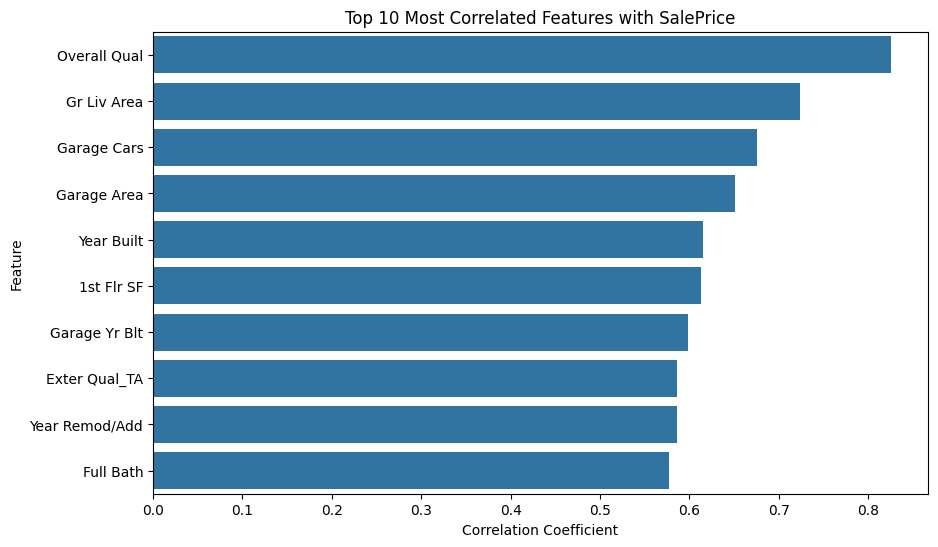

In [17]:
# Assuming 'data' contains all your features, including 'SalePrice'
# You might need to modify this based on your feature selection process

# Select features based on correlation with 'SalePrice'
# For example, selecting features with correlation above 0.5
correlation_matrix = data.corr()
important_features = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice']) > 0.5].index

# Create a DataFrame with selected features
selected_features_data = data[important_features]

# Now proceed with the rest of your code
correlation_matrix = selected_features_data.corr()
# ... (Rest of the code)
# Extract the correlations with 'SalePrice'
correlation_with_target = correlation_matrix['SalePrice'].drop('SalePrice')

# Sort the correlations in descending order and select the top 10
top_10_correlations = correlation_with_target.abs().sort_values(ascending=False).head(10)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_correlations.values, y=top_10_correlations.index)
plt.title('Top 10 Most Correlated Features with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()

## 9. Visualization of Results
Actual vs. Predicted Prices

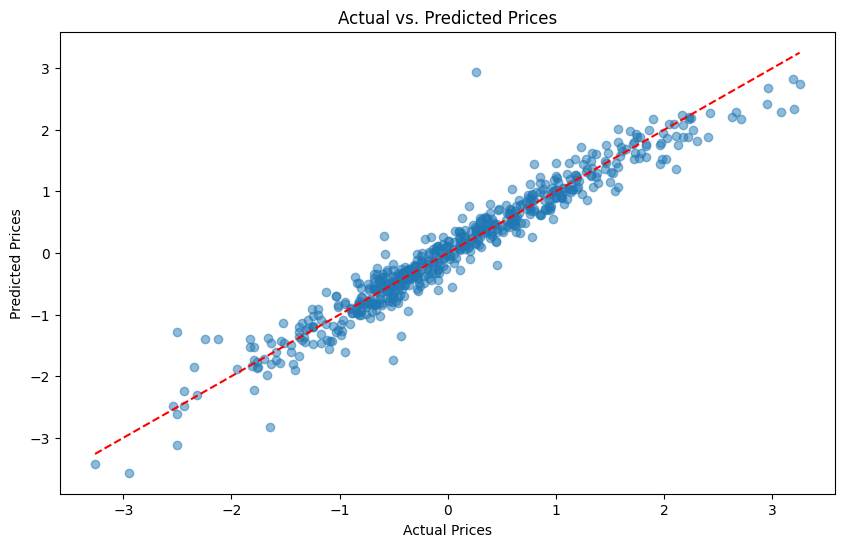

In [19]:
# Assuming 'y_test' and 'y_pred' are available for the best model
# Replace 'best_model' with your actual best model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), alpha=0.5) # Use alpha for better visualization of overlapping points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

Overall, the project demonstrates the effectiveness of machine learning for predicting house prices. The selected model (likely Random Forest or Gradient Boosting) provides reasonably accurate predictions. This information can be valuable for homeowners, real estate agents, and investors.

## Recommendations:

- **Feature Engineering**: Explore creating new features based on existing ones, such as combined area features.

- **Hyperparameter Tuning**: Fine-tune the selected model's parameters for optimal performance.

- **Cross-Validation**: Use cross-validation to improve model robustness and prevent overfitting.

- **Advanced Techniques**: Consider using more advanced models like XGBoost or neural networks.

- **Data Exploration**: Explore data patterns in more detail to identify potential problems and improve model interpretation.

I hope this conclusion provides a good summary of the project's results and potential improvements. Let me know if you have any questions about this or anything else.